In [1]:
import pandas as pd

mouse_d = pd.read_csv('mouse_discrim.csv')
mouse_d

,Brand,Touch,Chips,Driver,Compatibility,Game,Type
0,Brand1,7.5,17.5,7.0,8.0,8.0,A
1,Brand2,7.5,19.5,7.0,7.0,9.0,B
2,Brand3,8.5,18.0,8.5,8.0,9.5,B
3,Brand4,9.0,18.5,8.5,8.0,9.5,B
4,Brand5,7.0,14.0,6.5,7.0,7.5,C
5,Brand6,7.0,16.0,6.5,7.5,8.0,C
6,Brand7,7.5,17.0,8.0,7.5,8.0,A
7,Brand8,8.0,17.5,8.5,7.5,8.5,A
8,Brand9,7.0,16.5,6.0,8.0,7.0,C
9,Brand10,7.5,17.0,7.5,8.5,8.0,A


In [2]:
from for_ch15 import *

In [3]:
X_train = mouse_d.iloc[0:13 , 1:6] #训练样本的自变量数据
X_test = mouse_d.iloc[13:15 , 1:6] #测试样本的自变量数据
Y_train = mouse_d.iloc[0:13 , 6:7] #训练样本标签列的数据

In [4]:
predict_mahalanobis = mahalanuobis_discrim(X_test , X_train , Y_train)
print(predict_mahalanobis)

类中心： 
          0         1         2         3         4
0  0.058124  0.181711  0.659912  0.219971 -0.077037
1  1.336848  1.323894  0.879883  0.146647  1.579261
2 -0.639362 -1.064307 -0.989868 -0.219971 -0.770371

分类结果为： 
['A', 'B', 'B', 'B', 'C', 'C', 'A', 'A', 'C', 'A', 'C', 'C', 'A', 'C', 'A']


In [5]:
from sklearn.metrics import classification_report

print('马氏距离判别情况汇总： ')
print(classification_report(Y_train.values.ravel(),
                           predict_mahalanobis[:13]))

马氏距离判别情况汇总： 
             precision    recall  f1-score   support

          A       1.00      1.00      1.00         5
          B       1.00      1.00      1.00         3
          C       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        13



In [6]:
Y_test = mouse_d.iloc[13:15 , 6:7]
X = mouse_d.iloc[0:15 , 1:6] #X是全部样本的自变量矩阵

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

mouse_lda = LDA()
mouse_lda.fit(X_train , Y_train.values.ravel())
mouse_lda_train_predicted = mouse_lda.predict(X_train)
print('线性判别训练集判别结果： ')
print(mouse_lda_train_predicted)
print(53 * '-')
mouse_lda_test_predicted = mouse_lda.predict(X_test)
print('线性判别待判别样本判别结果为： ')
print(mouse_lda_test_predicted)

线性判别训练集判别结果： 
['A' 'B' 'B' 'B' 'C' 'C' 'A' 'A' 'C' 'A' 'C' 'C' 'A']
-----------------------------------------------------
线性判别待判别样本判别结果为： 
['C' 'A']


In [8]:
mouse_p_lda = mouse_lda.predict_proba(X)
mouse_prob_lda = pd.DataFrame(mouse_p_lda)
mouse_prob_lda.columns = ['A','B','C']
mouse_prob_lda

,A,B,C
0,0.997795,8.564598e-04,1.348487e-03
1,0.054379,9.456210e-01,2.576884e-09
2,0.294763,7.052370e-01,3.146251e-10
3,0.125147,8.748532e-01,2.668194e-10
4,0.000013,9.852799e-14,9.999873e-01
5,0.000905,2.841573e-08,9.990953e-01
6,0.999895,1.042292e-04,6.595103e-07
7,0.880103,1.198974e-01,3.591996e-09
8,0.001842,4.837688e-11,9.981580e-01
9,0.999968,1.059884e-05,2.093701e-05


In [9]:
print('LDA判别情况汇总')
print(classification_report(Y_train.values.ravel(),
                           mouse_lda_train_predicted))

LDA判别情况汇总
             precision    recall  f1-score   support

          A       1.00      1.00      1.00         5
          B       1.00      1.00      1.00         3
          C       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        13



In [10]:
from sklearn.naive_bayes import GaussianNB

mouse_bayes = GaussianNB().fit(X_train , Y_train.values.ravel())
mouse_bayes_train_predicted = mouse_bayes.predict(X_train)
print('高斯朴素贝叶斯算法对训练集的判别结果为： ')
print(mouse_bayes_train_predicted)
print(53 * '-')
mouse_bayes_test_predicted = mouse_bayes.predict(X_test)
print('高斯朴素贝叶斯算法对待判别样本判别结果为： ')
print(mouse_bayes_test_predicted)

高斯朴素贝叶斯算法对训练集的判别结果为： 
['A' 'B' 'B' 'B' 'C' 'C' 'A' 'A' 'C' 'A' 'C' 'C' 'A']
-----------------------------------------------------
高斯朴素贝叶斯算法对待判别样本判别结果为： 
['C' 'A']


In [11]:
p_bayes = mouse_bayes.predict_proba(X)
prob_bayes = pd.DataFrame(p_bayes)
prob_bayes.columns = ['A','B','C']
prob_bayes

,A,B,C
0,9.994702e-01,2.801676e-09,5.297584e-04
1,5.651549e-19,1.000000e+00,1.133895e-08
2,9.705561e-09,1.000000e+00,5.990506e-28
3,8.789438e-19,1.000000e+00,7.874586e-31
4,4.781298e-40,1.110736e-27,1.000000e+00
5,4.724837e-08,2.924439e-13,1.000000e+00
6,1.000000e+00,2.808745e-10,1.175461e-12
7,9.976133e-01,2.386669e-03,1.512562e-20
8,1.421331e-06,5.527813e-27,9.999986e-01
9,9.999999e-01,1.703590e-10,5.957511e-08


In [12]:
print('判别情况汇总: ')
print(classification_report(Y_train.values.ravel(),
                           mouse_bayes_train_predicted))

判别情况汇总: 
             precision    recall  f1-score   support

          A       1.00      1.00      1.00         5
          B       1.00      1.00      1.00         3
          C       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        13



In [13]:
iris = pd.read_csv('iris.csv')
iris.iloc[[1, 51, 101]] #对指定索引的数据进行展示

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,4.9,3.0,1.4,0.2,setosa
51,6.4,3.2,4.5,1.5,versicolor
101,5.8,2.7,5.1,1.9,virginica


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score

x = iris.iloc[: , 0:4] #构造用于判别或分类的特征数据
y = iris.iloc[: , 4] #构造分类结果数据
X_train , X_test , Y_train , Y_test = train_test_split(x , y, test_size = 0.2)

#将数据分为训练集和测试集
#注意：划分数据是随机的，每次执行的结果会有差异
#train_test_split可以根据参数test_size指定的比例分拆原始数据

iris_knn = KNeighborsClassifier(algorithm = 'kd_tree')
#参数algorithm可以指定为'auto','ball_tree','kd_tree','brute',对应不同算法
iris_knn.fit(X_train , Y_train)
#结果输出
answer = iris_knn.predict(x)
answer_array = np.array([y , answer])
answer_mat = np.matrix(answer_array).T
result = pd.DataFrame(answer_mat)
result.columns = ['真实类别','预测类别']
result.iloc[[1 , 51 , 101]] #显示索引为1 ， 51 ，101 的样本情况

,真实类别,预测类别
1,setosa,setosa
51,versicolor,versicolor
101,virginica,virginica


In [15]:
print('kNN算法对测试集数据判别结果为： ')
print(classification_report(Y_test , iris_knn.predict(X_test)))
print(53 * '-')
print('kNN算法对全部数据判别结果： ')
print(classification_report(y , iris_knn.predict(x)))

kNN算法对测试集数据判别结果为： 
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.90      0.95        10
  virginica       0.88      1.00      0.93         7

avg / total       0.97      0.97      0.97        30

-----------------------------------------------------
kNN算法对全部数据判别结果： 
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.96      0.94      0.95        50
  virginica       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150



In [16]:
scores = cross_val_score(iris_knn , x, y ,cv = 5)
cross = pd.DataFrame(scores)
cross.columns = ['5折交叉检验结果']
cross.T

,0,1,2,3,4
5折交叉检验结果,0.966667,1.0,0.933333,0.966667,1.0


In [17]:
from sklearn.tree import DecisionTreeClassifier
#构造决策树 ， 不纯度采用熵（信息增量）来度量 ，即ID3算法

iris_tree = DecisionTreeClassifier(criterion = 'entropy')
iris_tree.fit(X_train , Y_train)
answer = iris_tree.predict(x)
answer_array = np.array([y , answer])
answer_mat = np.matrix(answer_array).T
result = pd.DataFrame(answer_mat)
result.columns = ['真实类别','预测类别']
result.iloc[[1 , 51 , 101]] #显示索引为1 ， 51 ，101 的样本情况

,真实类别,预测类别
1,setosa,setosa
51,versicolor,versicolor
101,virginica,virginica


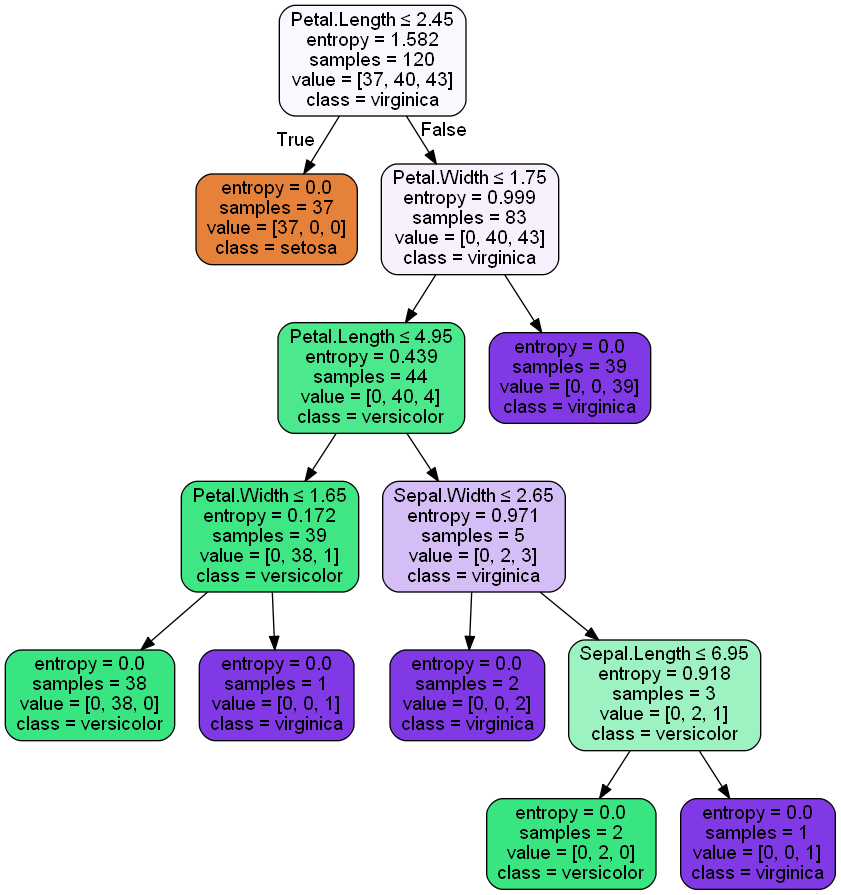

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.core.display import Image
#pydotplus需要先安装

dot_data = StringIO()
export_graphviz(iris_tree , out_file = dot_data , filled = True ,
               feature_names = iris.columns[:4],
               class_names = iris['Species'].unique() ,
               rounded = True , special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
print('决策树对测试集数据判别结果为： ')
print(classification_report(Y_test , iris_tree.predict(X_test)))
print(53 * '-')
print('决策树对全部数据判别结果： ')
print(classification_report(y , iris_tree.predict(x)))

决策树对测试集数据判别结果为： 
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.90      0.90      0.90        10
  virginica       0.86      0.86      0.86         7

avg / total       0.93      0.93      0.93        30

-----------------------------------------------------
决策树对全部数据判别结果： 
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.98      0.98        50
  virginica       0.98      0.98      0.98        50

avg / total       0.99      0.99      0.99       150



In [20]:
scores = cross_val_score(iris_tree , x, y ,cv = 5)
cross = pd.DataFrame(scores)
cross.columns = ['5折交叉检验结果']
cross.T

,0,1,2,3,4
5折交叉检验结果,0.966667,0.966667,0.9,0.966667,1.0


In [21]:
from sklearn.ensemble import RandomForestClassifier

iris_rf = RandomForestClassifier(n_estimators = 100)
#参数n_estimators 用于指定森林中的树木数量
iris_rf.fit(X_train , Y_train)
answer = iris_rf.predict(x)
answer_array = np.array([y , answer])
answer_mat = np.matrix(answer_array).T
result = pd.DataFrame(answer_mat)
result.columns = ['真实类别','预测类别']
result.iloc[[1 , 51 , 101]] #显示索引为1 ， 51 ，101 的样本情况

C:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,真实类别,预测类别
1,setosa,setosa
51,versicolor,versicolor
101,virginica,virginica


In [22]:
print('随机森林对测试集数据判别结果为： ')
print(classification_report(Y_test , iris_rf.predict(X_test)))
print(53 * '-')
print('随机森林对全部数据判别结果： ')
print(classification_report(y , iris_rf.predict(x)))

随机森林对测试集数据判别结果为： 
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.90      0.90      0.90        10
  virginica       0.86      0.86      0.86         7

avg / total       0.93      0.93      0.93        30

-----------------------------------------------------
随机森林对全部数据判别结果： 
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.98      0.98        50
  virginica       0.98      0.98      0.98        50

avg / total       0.99      0.99      0.99       150



In [23]:
scores = cross_val_score(iris_rf , x, y ,cv = 5)
cross = pd.DataFrame(scores)
cross.columns = ['5折交叉检验结果']
cross.T

,0,1,2,3,4
5折交叉检验结果,0.966667,0.966667,0.9,0.933333,1.0


In [24]:
from sklearn import svm

iris_svm = svm.SVC()

iris_svm.fit(X_train , Y_train)
answer = iris_svm.predict(x)
answer_array = np.array([y , answer])
answer_mat = np.matrix(answer_array).T
result = pd.DataFrame(answer_mat)
result.columns = ['真实类别','预测类别']
result.iloc[[1 , 51 , 101]] #显示索引为1 ， 51 ，101 的样本情况

,真实类别,预测类别
1,setosa,setosa
51,versicolor,versicolor
101,virginica,virginica


In [25]:
print('SVM对测试集数据判别结果为： ')
print(classification_report(Y_test , iris_svm.predict(X_test)))
print(53 * '-')
print('SVM对全部数据判别结果： ')
print(classification_report(y , iris_svm.predict(x)))

SVM对测试集数据判别结果为： 
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.90      0.95        10
  virginica       0.88      1.00      0.93         7

avg / total       0.97      0.97      0.97        30

-----------------------------------------------------
SVM对全部数据判别结果： 
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       1.00      0.96      0.98        50
  virginica       0.96      1.00      0.98        50

avg / total       0.99      0.99      0.99       150

